In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\K-Means & Hirarchical Clustering\Hitters.csv")


In [2]:
# Check for missing values
df.isnull().sum()


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [3]:
df = df.dropna()


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['League'] = label_encoder.fit_transform(df['League'])
df['Division'] = label_encoder.fit_transform(df['Division'])
df['NewLeague'] = label_encoder.fit_transform(df['NewLeague'])


In [5]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 
                  'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 
                  'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']

# Standardize the features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [6]:
from sklearn.cluster import AgglomerativeClustering

# Select features for clustering
X = df[numerical_cols]  # You can choose to use all or specific features

# Apply hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  # Change n_clusters as needed
df['Cluster'] = model.fit_predict(X)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


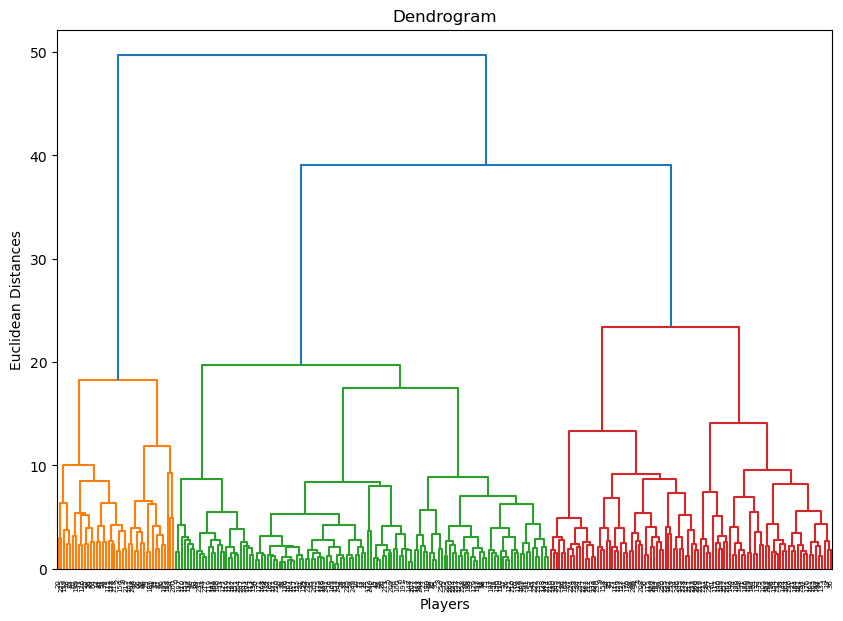

In [7]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Players')
plt.ylabel('Euclidean Distances')
plt.show()


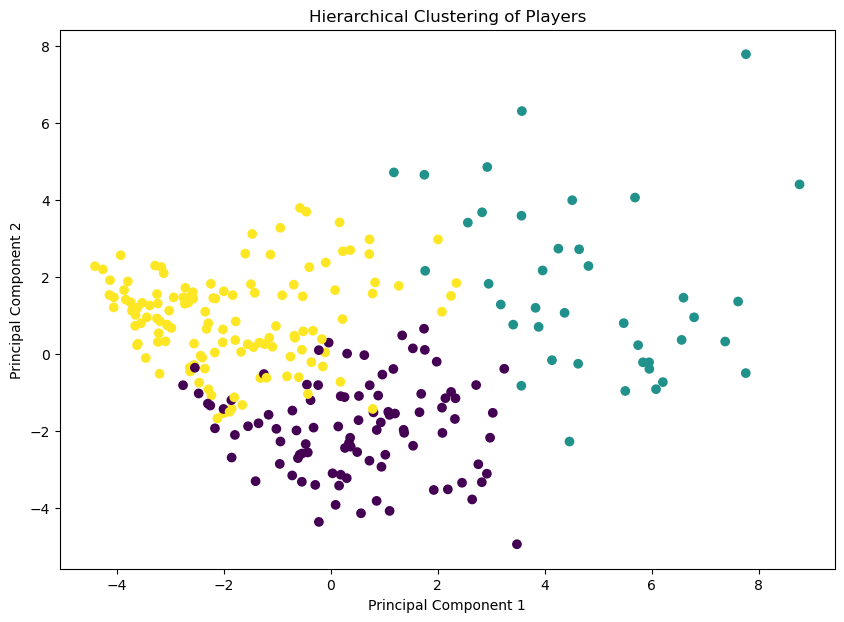

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering of Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score}')


Silhouette Score: 0.2618597814500876
